## Ethereum Analysis

In [7]:
# Importing necessary libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
import ast
import math
import mplfinance as mpf
import seaborn as sns

# Defining the path to the CSV files
file_path_jan = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-01.csv"
file_path_feb = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-02.csv"
file_path_mar = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-03.csv"
file_path_apr = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-04.csv"
file_path_may = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-05.csv"
file_path_june = r"C:\Users\rumey\OneDrive\Masaüstü\ETH\ETHUSDT-1m-2024-06.csv"

# Reading the CSV files
df_jan = pd.read_csv(file_path_jan, delimiter=',', header=None)
df_feb = pd.read_csv(file_path_feb, delimiter=',', header=None)
df_mar = pd.read_csv(file_path_mar, delimiter=',', header=None)
df_apr = pd.read_csv(file_path_apr, delimiter=',', header=None)
df_may = pd.read_csv(file_path_may, delimiter=',', header=None)
df_june = pd.read_csv(file_path_june, delimiter=',', header=None)

In [19]:
# Merging the DataFrames
df = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_june], ignore_index=True)


new_headers = [
    'open_time', 'open_price', 'high_price', 'low_price', 'close_price', 
    'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 
    'taker_buy_base_asset', 
    'taker_buy_quote_asset', 'Ignore'
]

# Assigning the new headers to the DataFrame
df.columns = new_headers

#Time convertion milliseconds to seconds
df['open_time'] = df['open_time'] // 1000
df['close_time'] = df['close_time'] // 1000

#Time convertion to unix time to normal datetime format
df['open_time'] = pd.to_datetime(df['open_time'], unit='s')
df['close_time'] = pd.to_datetime(df['close_time'], unit='s')

# Check the dataframe
df

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset,taker_buy_quote_asset,Ignore
0,2024-01-01 00:00:00,2281.87,2282.94,2281.27,2282.20,170.0969,2024-01-01 00:00:59,388169.958624,532,75.4077,172082.453351,0
1,2024-01-01 00:01:00,2282.20,2283.97,2282.20,2283.96,125.3386,2024-01-01 00:01:59,286127.196717,436,90.3505,206249.533069,0
2,2024-01-01 00:02:00,2283.97,2284.60,2283.80,2284.39,178.8883,2024-01-01 00:02:59,408627.974263,413,50.4142,115157.611460,0
3,2024-01-01 00:03:00,2284.38,2286.43,2284.38,2286.37,258.6704,2024-01-01 00:03:59,591215.450907,647,218.1628,498605.913328,0
4,2024-01-01 00:04:00,2286.38,2287.84,2286.37,2287.84,177.5759,2024-01-01 00:04:59,406172.529258,565,151.3902,346273.035764,0
...,...,...,...,...,...,...,...,...,...,...,...,...
262075,2024-06-30 23:55:00,3441.61,3441.93,3441.60,3441.92,20.4621,2024-06-30 23:55:59,70425.272784,121,16.7140,57524.812804,0
262076,2024-06-30 23:56:00,3441.93,3442.40,3439.50,3440.18,129.9573,2024-06-30 23:56:59,447180.857106,526,28.1277,96779.976086,0
262077,2024-06-30 23:57:00,3440.19,3440.50,3440.18,3440.50,18.0740,2024-06-30 23:57:59,62180.676560,64,13.3450,45910.600869,0
262078,2024-06-30 23:58:00,3440.49,3440.50,3438.27,3438.28,129.2785,2024-06-30 23:58:59,444618.121309,754,30.6844,105521.803755,0


In [ ]:
#Adding new column for taker sell
df['taker_sell_base_asset'] = df['volume']-df['taker_buy_base_asset']
df[['taker_sell_base_asset','taker_buy_base_asset','open_price','close_price']]
df

## Grouping Data by 15, 30, 60, and 120 Minute Intervals

In this analysis, we examine the correlation between percentage price change and volume. To analyze general trends, I grouped the data into intervals of 15, 30, 60, and 120 minutes.

In [20]:
df_15 = df.copy()
df_15['group'] = df_15.index // 15
df_15.head(30)

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset,taker_buy_quote_asset,Ignore,group
0,2024-01-01 00:00:00,2281.87,2282.94,2281.27,2282.20,170.0969,2024-01-01 00:00:59,3.881700e+05,532,75.4077,1.720825e+05,0,0
1,2024-01-01 00:01:00,2282.20,2283.97,2282.20,2283.96,125.3386,2024-01-01 00:01:59,2.861272e+05,436,90.3505,2.062495e+05,0,0
2,2024-01-01 00:02:00,2283.97,2284.60,2283.80,2284.39,178.8883,2024-01-01 00:02:59,4.086280e+05,413,50.4142,1.151576e+05,0,0
3,2024-01-01 00:03:00,2284.38,2286.43,2284.38,2286.37,258.6704,2024-01-01 00:03:59,5.912155e+05,647,218.1628,4.986059e+05,0,0
4,2024-01-01 00:04:00,2286.38,2287.84,2286.37,2287.84,177.5759,2024-01-01 00:04:59,4.061725e+05,565,151.3902,3.462730e+05,0,0
5,2024-01-01 00:05:00,2287.83,2289.79,2287.06,2289.56,376.5779,2024-01-01 00:05:59,8.618028e+05,973,215.2966,4.926862e+05,0,0
6,2024-01-01 00:06:00,2289.56,2291.00,2289.55,2290.48,660.4692,2024-01-01 00:06:59,1.512733e+06,810,534.9090,1.225122e+06,0,0
7,2024-01-01 00:07:00,2290.47,2291.83,2290.10,2290.35,286.6485,2024-01-01 00:07:59,6.566597e+05,748,121.3456,2.779477e+05,0,0
8,2024-01-01 00:08:00,2290.35,2290.80,2289.22,2290.79,172.1272,2024-01-01 00:08:59,3.941641e+05,428,66.3526,1.519296e+05,0,0
9,2024-01-01 00:09:00,2290.79,2290.99,2290.14,2290.77,157.1062,2024-01-01 00:09:59,3.598679e+05,395,120.5913,2.762241e+05,0,0


In [21]:
#Using this formula, the opening price, closing price, and opening time are determined for each group.
# The percentage change in price is then calculated for each interval.

def calculate_percentage_change(group):
    opening_price = group['open_price'].iloc[0]  # First row's opening price in the group
    closing_price = group['close_price'].iloc[-1]  # Last row's closing price in the group
    percentage_change = ((closing_price - opening_price) / opening_price) * 100
    opening_time = group['open_time'].iloc[0]  # First row's opening time in the group
    return pd.Series({
        'open_price': opening_price,
        'close_price': closing_price,
        'price_change_percent': percentage_change,
        'open_time':opening_time
    })

# Applying the function once and it stores results
percentage_changes = df_15.groupby('group').apply(calculate_percentage_change).reset_index()

# Aggregating other required fields
df_15_pivot = df_15.groupby('group').agg({
    'quote_asset_volume': 'sum',
    'high_price': 'max',
    'low_price': 'min'
}).reset_index()

# Merging the results
df_15_pivot = df_15_pivot.merge(percentage_changes, on='group')
df_15_pivot.set_index('group',inplace=True)
df_15_pivot

C:\Users\rumey\AppData\Local\Temp\ipykernel_21560\1612928821.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_changes = df_15.groupby('group').apply(calculate_percentage_change).reset_index()


,quote_asset_volume,high_price,low_price,open_price,close_price,price_change_percent,open_time
group,,,,,,,
0,1.006322e+07,2296.97,2281.27,2281.87,2296.71,0.650344,2024-01-01 00:00:00
1,6.169936e+06,2297.00,2289.00,2296.71,2291.05,-0.246439,2024-01-01 00:15:00
2,5.043680e+06,2294.78,2288.55,2291.05,2293.22,0.094716,2024-01-01 00:30:00
3,3.410731e+06,2297.18,2292.24,2293.23,2295.51,0.099423,2024-01-01 00:45:00
4,3.240474e+06,2297.40,2292.90,2295.52,2296.59,0.046613,2024-01-01 01:00:00
...,...,...,...,...,...,...,...
17467,8.737120e+06,3450.99,3443.01,3449.00,3450.65,0.047840,2024-06-30 22:45:00
17468,8.115741e+06,3456.40,3448.00,3450.61,3448.16,-0.071002,2024-06-30 23:00:00
17469,5.409422e+06,3450.50,3443.43,3448.20,3445.52,-0.077722,2024-06-30 23:15:00


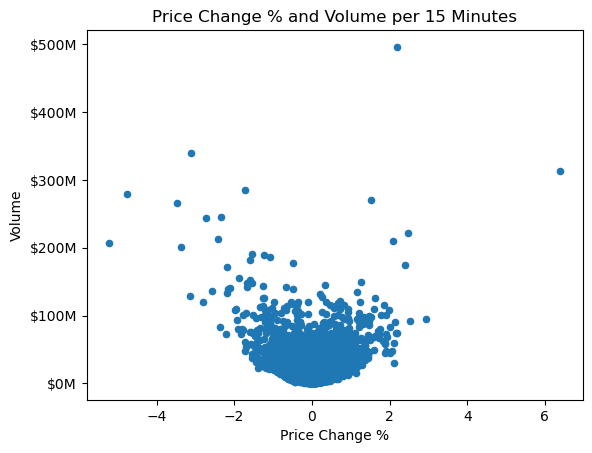

In [22]:
df_15_pivot.plot(kind='scatter', x='price_change_percent', y='quote_asset_volume')
plt.title('Price Change % and Volume per 15 Minutes')
plt.xlabel('Price Change %')
plt.ylabel('Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)

C:\Users\rumey\AppData\Local\Temp\ipykernel_21560\1840167656.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_changes = df_30.groupby('group').apply(calculate_percentage_change).reset_index()


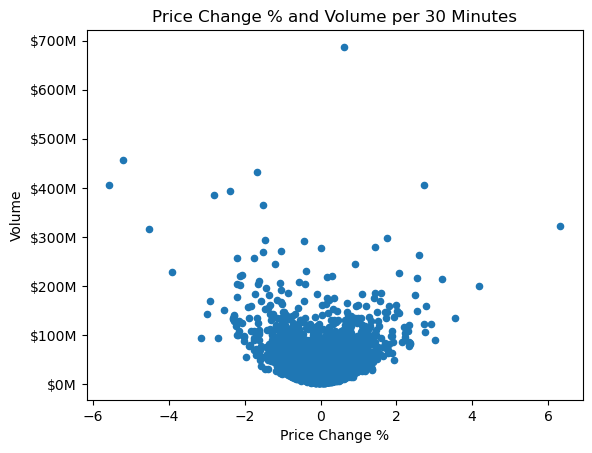

In [23]:
# The same steps are repeated for the 30-minute interval.

df_30 = df.copy()
df_30['group'] = df_30.index // 30


# Applying the function once and store results
percentage_changes = df_30.groupby('group').apply(calculate_percentage_change).reset_index()

# Aggregating other required fields
df_30_pivot = df_30.groupby('group').agg({
    'quote_asset_volume': 'sum',
    'high_price': 'max',
    'low_price': 'min'
}).reset_index()

# Merging the results
df_30_pivot = df_30_pivot.merge(percentage_changes, on='group')
df_30_pivot.set_index('group',inplace=True)
df_30_pivot

df_30_pivot.plot(kind='scatter', x='price_change_percent', y='quote_asset_volume')
plt.title('Price Change % and Volume per 30 Minutes')
plt.xlabel('Price Change %')
plt.ylabel('Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)

C:\Users\rumey\AppData\Local\Temp\ipykernel_21560\3402292842.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_changes = df_60.groupby('group').apply(calculate_percentage_change).reset_index()


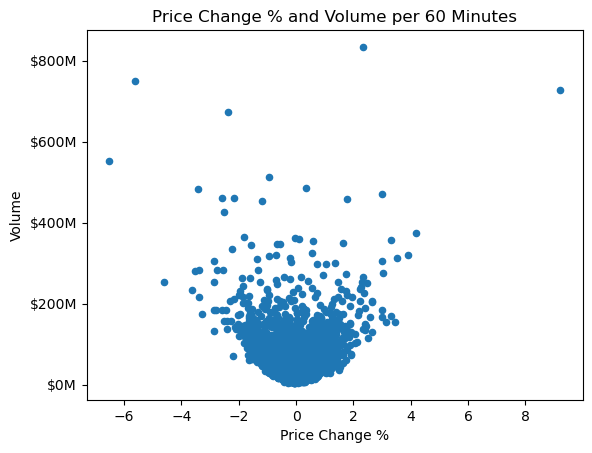

In [24]:
# The same steps are repeated for the 60-minute interval.

df_60 = df.copy()
df_60['group'] = df_60.index // 60


# Apply the function once and store results
percentage_changes = df_60.groupby('group').apply(calculate_percentage_change).reset_index()

# Aggregating other required fields
df_60_pivot = df_60.groupby('group').agg({
    'quote_asset_volume': 'sum',
    'high_price': 'max',
    'low_price': 'min'
}).reset_index()

# Merge the results
df_60_pivot = df_60_pivot.merge(percentage_changes, on='group')
df_60_pivot.set_index('group',inplace=True)
df_60_pivot

df_60_pivot.plot(kind='scatter', x='price_change_percent', y='quote_asset_volume')
plt.title('Price Change % and Volume per 60 Minutes')
plt.xlabel('Price Change %')
plt.ylabel('Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)


C:\Users\rumey\AppData\Local\Temp\ipykernel_21560\416868875.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_changes = df_120.groupby('group').apply(calculate_percentage_change).reset_index()


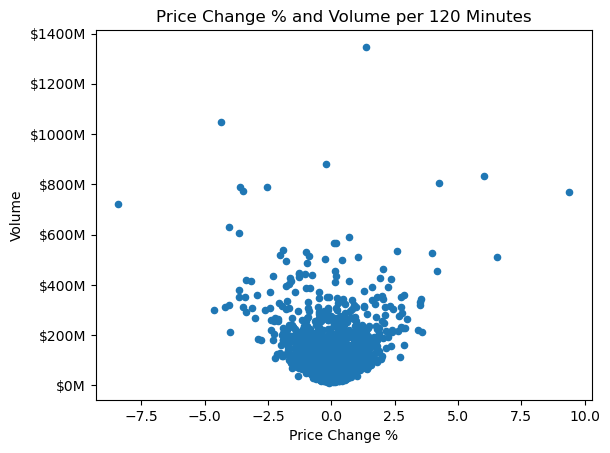

In [25]:
# The same steps are repeated for the 120-minute interval.

df_120 = df.copy()
df_120['group'] = df_120.index // 120


# Applying the function once and store results
percentage_changes = df_120.groupby('group').apply(calculate_percentage_change).reset_index()

# Aggregating other required fields
df_120_pivot = df_120.groupby('group').agg({
    'quote_asset_volume': 'sum',
    'high_price': 'max',
    'low_price': 'min'
}).reset_index()

# Merging the results
df_120_pivot = df_120_pivot.merge(percentage_changes, on='group')
df_120_pivot.set_index('group',inplace=True)
df_120_pivot

df_120_pivot.plot(kind='scatter', x='price_change_percent', y='quote_asset_volume')
plt.title('Price Change % and Volume per 120 Minutes')
plt.xlabel('Price Change %')
plt.ylabel('Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)

C:\Users\rumey\AppData\Local\Temp\ipykernel_21560\3146433667.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_changes = df_day.groupby('group').apply(calculate_percentage_change).reset_index()


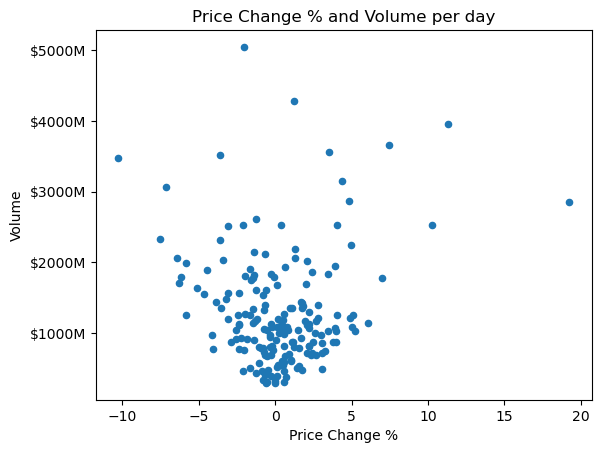

In [35]:
# The same steps are repeated for the 24-Hour interval.

df_day = df.copy()
df_day['group'] = df_day.index // 1440


# Applying the function once and store results
percentage_changes = df_day.groupby('group').apply(calculate_percentage_change).reset_index()

# Aggregating other required fields
df_day_pivot = df_day.groupby('group').agg({
    'quote_asset_volume': 'sum',
    'high_price': 'max',
    'low_price': 'min'
}).reset_index()

# Merging the results
df_day_pivot = df_day_pivot.merge(percentage_changes, on='group')
df_day_pivot.set_index('group',inplace=True)
df_day_pivot

df_day_pivot.plot(kind='scatter', x='price_change_percent', y='quote_asset_volume')
plt.title('Price Change % and Volume per day')
plt.xlabel('Price Change %')
plt.ylabel('Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)

## Taker Buy vs Taker Sell

Over the course of a month, we analyze the distribution of Ethereum trading volume between taker buy and taker sell transactions. The analysis reveals that the volume is fairly balanced, with taker buy transactions accounting for 49.2% and taker sell transactions accounting for 50.8% of the total trading volume. This indicates a relatively equal distribution of buying and selling activity in the market.

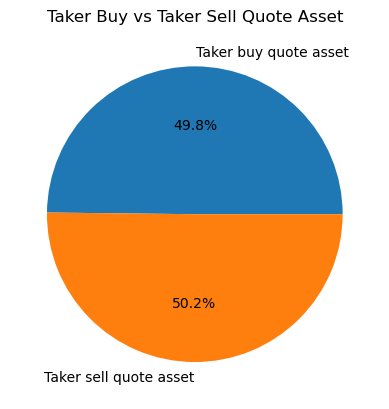

In [36]:
df_1 = df.copy()

df_1_pie  = df_1[['quote_asset_volume','taker_buy_quote_asset']].sum().to_frame().transpose()
df_1_pie['taker_sell_quote_asset'] = df_1_pie['quote_asset_volume'] - df_1_pie['taker_buy_quote_asset']

pie_data = df_1_pie[['taker_buy_quote_asset', 'taker_sell_quote_asset']].iloc[0]

# Plotting the pie chart
pie_data.plot(kind='pie', labels=['Taker buy quote asset', 'Taker sell quote asset'], autopct='%1.1f%%')
plt.ylabel('')
plt.title('Taker Buy vs Taker Sell Quote Asset')
plt.show()

## Average Price of Ethereum Coin Between January and June

When we look at the 6-month Ethereum price and its changes, there is some points that gives the signal for investors. When it reaches highest levels, we can say that investors holding positions should be cautious, as there is a high probability of a reversal from this point. Similarly local minumum points can also be seen as support levels for long-term investors.

Text(0.5, 0, 'Date')

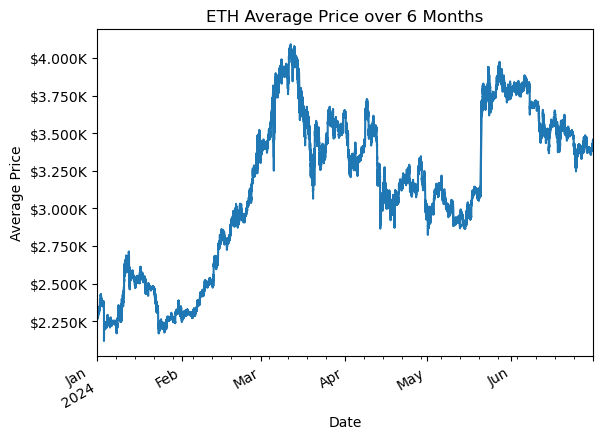

In [81]:
df_2 = df.copy()

df_2['avg_price'] = df_2['quote_asset_volume'] / df_2['volume'] 
df_2_line = df_2[['open_time','avg_price']]

df_2_line.plot(kind='line', x='open_time', y='avg_price', legend=False)

plt.title('ETH Average Price over 6 Months')

plt.ylabel('Average Price')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${x/1000:.3f}K')
plt.gca().yaxis.set_major_formatter(ticks_y)


plt.gcf().autofmt_xdate()  # Rotating date labels
plt.xlabel('Date')


## Candlestick Charts for 120 Minutes

To visualize price changes over different intervals, candlestick charts were employed. These charts help to illustrate the price movements more clearly, allowing for a better understanding of the fluctuations and trends in Ethereum's price throughout the 6 months.

c:\Users\rumey\Anaconda3\envs\course\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


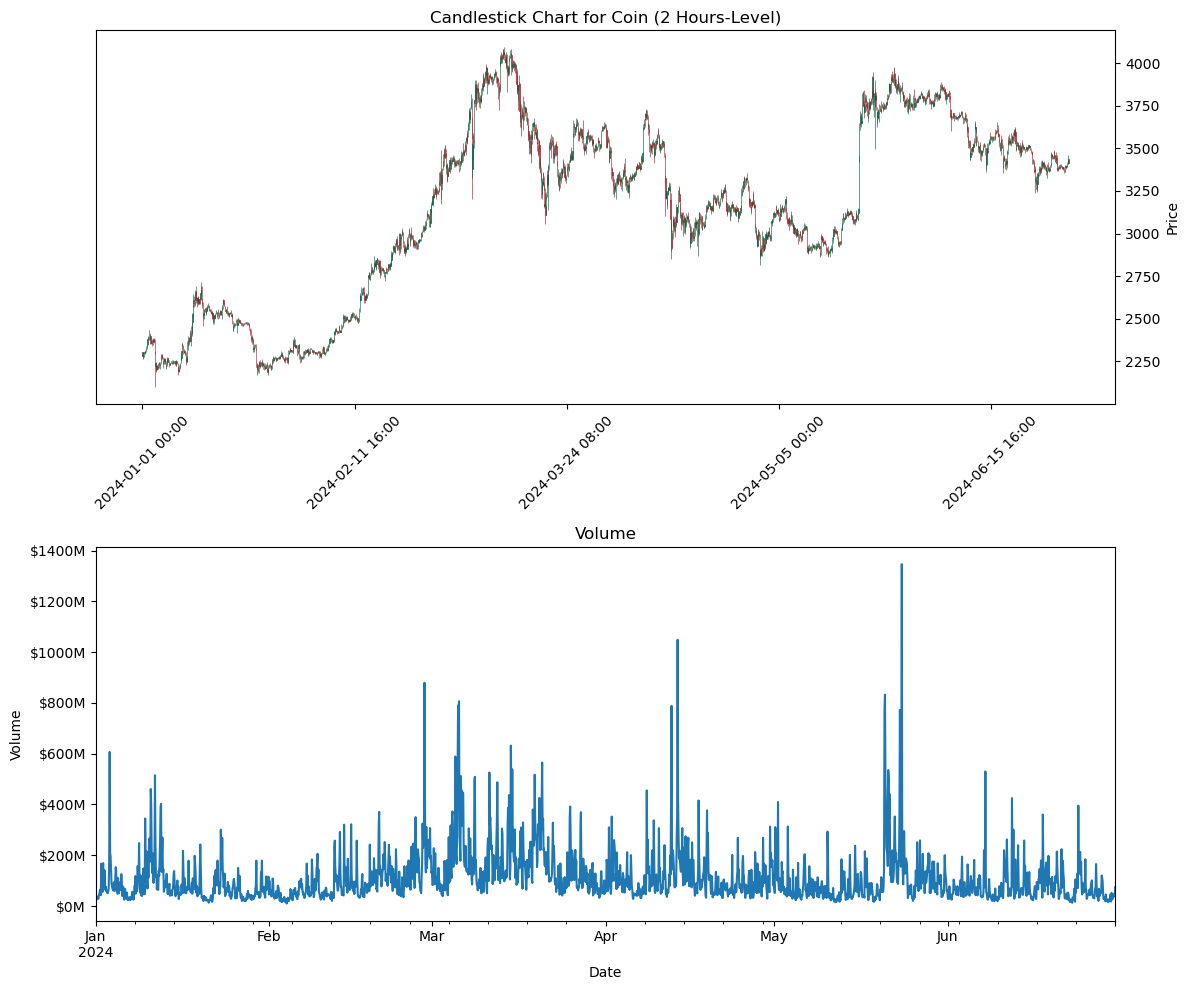

In [74]:
df_120_pivot_1 = df_120_pivot[['open_time','open_price','high_price', 'low_price', 'close_price']].copy()
df_120_pivot_1.set_index('open_time', inplace=True)
df_120_pivot_1.columns = ['Open', 'High', 'Low', 'Close']

df_120_pivot_2 = df_120_pivot[['quote_asset_volume','open_time']]
df_120_pivot_2.set_index('open_time',inplace=True)


# Creating figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Ploting the candlestick chart in the first subplot
mpf.plot(df_120_pivot_1, type='candle', style='charles', ax=ax[0], datetime_format='%Y-%m-%d %H:%M', ylabel='Price')
ax[0].set_title('Candlestick Chart for Coin (2 Hours-Level)')
# Ploting the volume data in the second subplot
df_120_pivot_2.plot(kind='line', ax=ax[1], legend=False)
ax[1].set_title('Volume')
ax[1].set_ylabel('Volume')
ax[1].set_xlabel('Date')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))


# Adjusting layout
plt.tight_layout()
plt.show()

## Moving Average for Close Price

The moving average values of the closing price are calculated based on the mean of the past 15 closing prices. This calculation is also repeated for intervals of 30, 60, and 120 minutes.

In [75]:
df_6 = df.copy()
# Initializing the new column with NaN values
df_6['moving_average'] = float('nan')

# Calculating the moving average of the next 15 rows using a for loop
window_size = 15
num_rows = len(df_6)


for i in range(num_rows):
    if i >= window_size:
        df_6.loc[i, 'moving_average'] = df_6['close_price'][i - window_size:i].mean()
    else:
        df_6.loc[i, 'moving_average'] = df_6['close_price'][0:i+1].mean()
df_6.head(20)

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset,taker_buy_quote_asset,Ignore,moving_average
0,2024-01-01 00:00:00,2281.87,2282.94,2281.27,2282.20,170.0969,2024-01-01 00:00:59,3.881700e+05,532,75.4077,1.720825e+05,0,2282.200000
1,2024-01-01 00:01:00,2282.20,2283.97,2282.20,2283.96,125.3386,2024-01-01 00:01:59,2.861272e+05,436,90.3505,2.062495e+05,0,2283.080000
2,2024-01-01 00:02:00,2283.97,2284.60,2283.80,2284.39,178.8883,2024-01-01 00:02:59,4.086280e+05,413,50.4142,1.151576e+05,0,2283.516667
3,2024-01-01 00:03:00,2284.38,2286.43,2284.38,2286.37,258.6704,2024-01-01 00:03:59,5.912155e+05,647,218.1628,4.986059e+05,0,2284.230000
4,2024-01-01 00:04:00,2286.38,2287.84,2286.37,2287.84,177.5759,2024-01-01 00:04:59,4.061725e+05,565,151.3902,3.462730e+05,0,2284.952000
5,2024-01-01 00:05:00,2287.83,2289.79,2287.06,2289.56,376.5779,2024-01-01 00:05:59,8.618028e+05,973,215.2966,4.926862e+05,0,2285.720000
6,2024-01-01 00:06:00,2289.56,2291.00,2289.55,2290.48,660.4692,2024-01-01 00:06:59,1.512733e+06,810,534.9090,1.225122e+06,0,2286.400000
7,2024-01-01 00:07:00,2290.47,2291.83,2290.10,2290.35,286.6485,2024-01-01 00:07:59,6.566597e+05,748,121.3456,2.779477e+05,0,2286.893750
8,2024-01-01 00:08:00,2290.35,2290.80,2289.22,2290.79,172.1272,2024-01-01 00:08:59,3.941641e+05,428,66.3526,1.519296e+05,0,2287.326667
9,2024-01-01 00:09:00,2290.79,2290.99,2290.14,2290.77,157.1062,2024-01-01 00:09:59,3.598679e+05,395,120.5913,2.762241e+05,0,2287.671000


In [76]:
df_15_pivot_updated = df_15_pivot.copy()

df_15_pivot_updated['moving_average'] = float('nan')

# Calculating the moving average of the next 15 rows using a for loop
window_size = 15
num_rows = len(df_15_pivot_updated)


for i in range(num_rows):
    if i >= window_size:
        df_15_pivot_updated.loc[i, 'moving_average'] = df_15_pivot_updated['close_price'][i - window_size:i].mean()
    else:
        df_15_pivot_updated.loc[i, 'moving_average'] = df_15_pivot_updated['close_price'][0:i+1].mean()
df_15_pivot_updated 

,quote_asset_volume,high_price,low_price,open_price,close_price,price_change_percent,open_time,moving_average
group,,,,,,,,
0,1.006322e+07,2296.97,2281.27,2281.87,2296.71,0.650344,2024-01-01 00:00:00,2296.710000
1,6.169936e+06,2297.00,2289.00,2296.71,2291.05,-0.246439,2024-01-01 00:15:00,2293.880000
2,5.043680e+06,2294.78,2288.55,2291.05,2293.22,0.094716,2024-01-01 00:30:00,2293.660000
3,3.410731e+06,2297.18,2292.24,2293.23,2295.51,0.099423,2024-01-01 00:45:00,2294.122500
4,3.240474e+06,2297.40,2292.90,2295.52,2296.59,0.046613,2024-01-01 01:00:00,2294.616000
...,...,...,...,...,...,...,...,...
17467,8.737120e+06,3450.99,3443.01,3449.00,3450.65,0.047840,2024-06-30 22:45:00,3426.807333
17468,8.115741e+06,3456.40,3448.00,3450.61,3448.16,-0.071002,2024-06-30 23:00:00,3428.866667
17469,5.409422e+06,3450.50,3443.43,3448.20,3445.52,-0.077722,2024-06-30 23:15:00,3430.421333


Moving Average Closed Price for 60 - Minutes

In [77]:
df_60_pivot_updated = df_60_pivot.copy()

df_60_pivot_updated['moving_average'] = float('nan')

# Calculating the moving average of the next 15 rows using a for loop
window_size = 15
num_rows = len(df_60_pivot_updated)


for i in range(num_rows):
    if i >= window_size:
        df_60_pivot_updated.loc[i, 'moving_average'] = df_60_pivot_updated['close_price'][i - window_size:i].mean()
    else:
        df_60_pivot_updated.loc[i, 'moving_average'] = df_60_pivot_updated['close_price'][0:i+1].mean()
df_60_pivot_updated 

,quote_asset_volume,high_price,low_price,open_price,close_price,price_change_percent,open_time,moving_average
group,,,,,,,,
0,2.468757e+07,2297.18,2281.27,2281.87,2295.51,0.597755,2024-01-01 00:00:00,2295.510000
1,1.936227e+07,2306.60,2292.90,2295.52,2303.72,0.357218,2024-01-01 01:00:00,2299.615000
2,1.334342e+07,2304.72,2291.20,2303.72,2293.02,-0.464466,2024-01-01 02:00:00,2297.416667
3,2.451962e+07,2294.50,2271.00,2293.03,2273.81,-0.838192,2024-01-01 03:00:00,2291.515000
4,2.201291e+07,2279.86,2265.24,2273.80,2279.55,0.252881,2024-01-01 04:00:00,2289.122000
...,...,...,...,...,...,...,...,...
4363,1.833043e+07,3434.00,3418.53,3424.37,3428.41,0.117978,2024-06-30 19:00:00,3391.422000
4364,2.031533e+07,3435.00,3420.70,3428.40,3420.70,-0.224595,2024-06-30 20:00:00,3395.744667
4365,1.691751e+07,3422.82,3408.96,3420.71,3413.22,-0.218960,2024-06-30 21:00:00,3399.318667


Moving Average Closed Price for 120 - Minutes

In [78]:
df_120_pivot_updated = df_120_pivot.copy()

df_120_pivot_updated['moving_average'] = float('nan')

# Calculating the moving average of the next 15 rows using a for loop
window_size = 15
num_rows = len(df_120_pivot_updated)

for i in range(num_rows):
    if i >= window_size:
        df_120_pivot_updated.loc[i, 'moving_average'] = df_120_pivot_updated['close_price'][i - window_size:i].mean()
    else:
        df_120_pivot_updated.loc[i, 'moving_average'] = df_120_pivot_updated['close_price'][0:i+1].mean()

df_120_pivot_updated

,quote_asset_volume,high_price,low_price,open_price,close_price,price_change_percent,open_time,moving_average
group,,,,,,,,
0,4.404984e+07,2306.60,2281.27,2281.87,2303.72,0.957548,2024-01-01 00:00:00,2303.720000
1,3.786304e+07,2304.72,2271.00,2303.72,2273.81,-1.298335,2024-01-01 02:00:00,2288.765000
2,3.729327e+07,2283.36,2265.24,2273.80,2275.89,0.091917,2024-01-01 04:00:00,2284.473333
3,2.673847e+07,2287.88,2274.16,2275.89,2284.67,0.385783,2024-01-01 06:00:00,2284.522500
4,3.126093e+07,2300.00,2280.00,2284.68,2299.80,0.661799,2024-01-01 08:00:00,2287.578000
...,...,...,...,...,...,...,...,...
2179,4.233865e+07,3404.88,3391.73,3396.89,3399.80,0.085667,2024-06-30 14:00:00,3387.482667
2180,4.731873e+07,3421.31,3391.99,3399.81,3413.39,0.399434,2024-06-30 16:00:00,3387.816667
2181,3.938591e+07,3434.00,3408.32,3413.40,3428.41,0.439738,2024-06-30 18:00:00,3388.679333


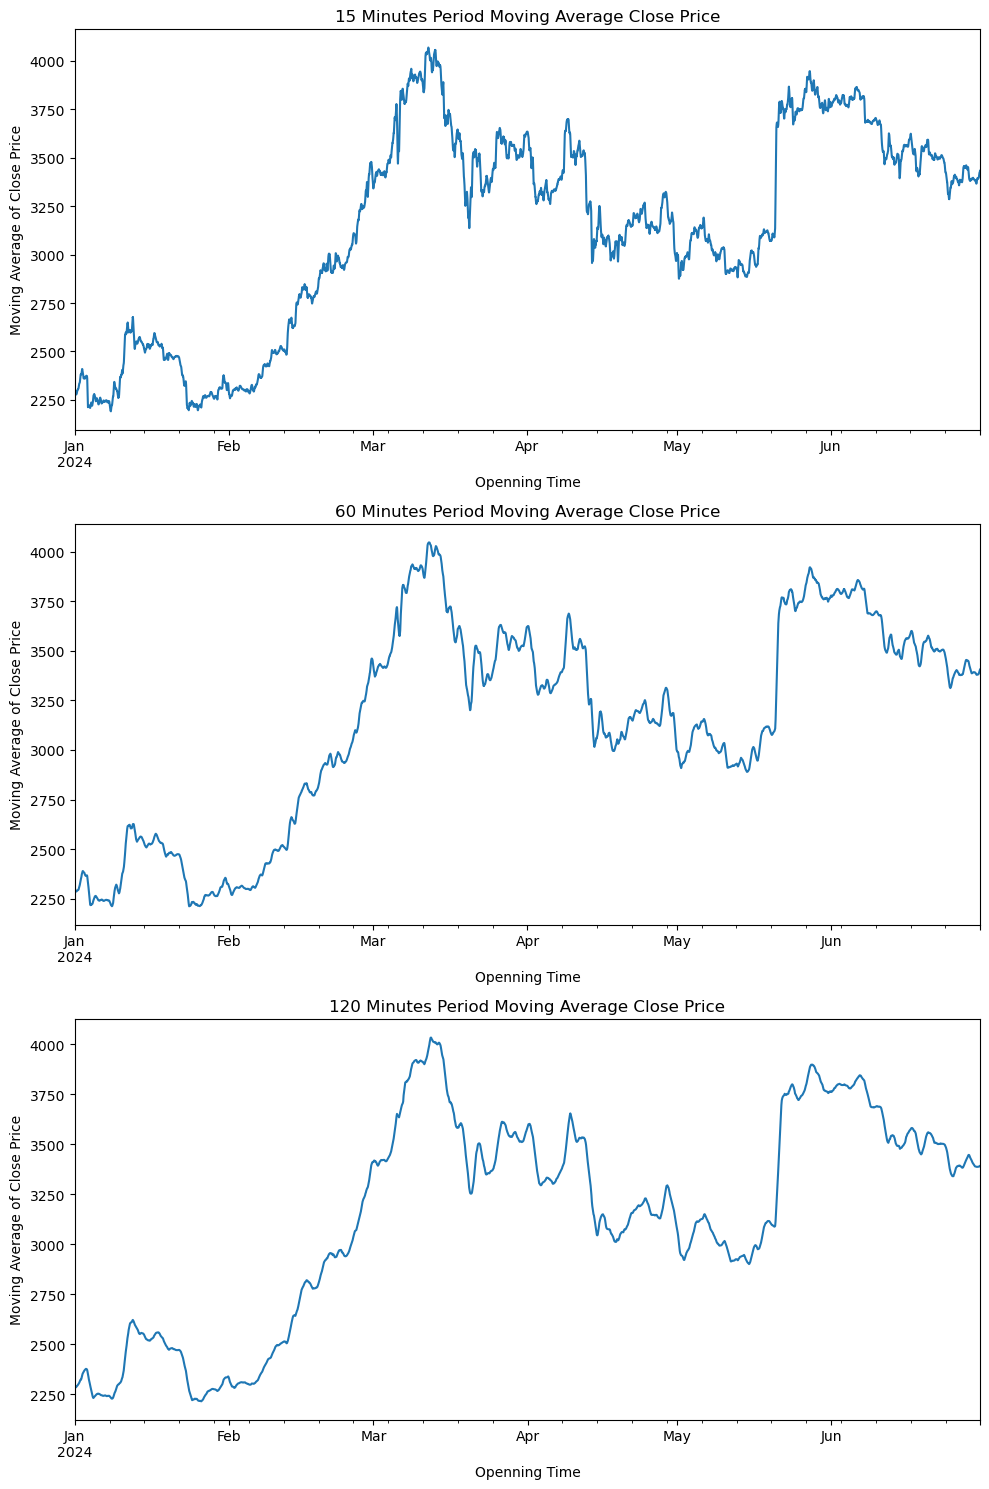

In [79]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Ploting the first graph
df_15_pivot_updated.plot(kind='line', x='open_time', y='moving_average',legend=False, ax=ax[0], title='15 Minutes Period Moving Average Close Price', xlabel='Openning Time', ylabel='Moving Average of Close Price')

# Ploting the second graph
df_60_pivot_updated.plot(kind='line', x='open_time', y='moving_average',legend=False, ax=ax[1], title='60 Minutes Period Moving Average Close Price', xlabel='Openning Time', ylabel='Moving Average of Close Price')

# Ploting the third graph
df_120_pivot_updated.plot(kind='line', x='open_time', y='moving_average',legend=False, ax=ax[2], title='120 Minutes Period Moving Average Close Price', xlabel='Openning Time', ylabel='Moving Average of Close Price')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

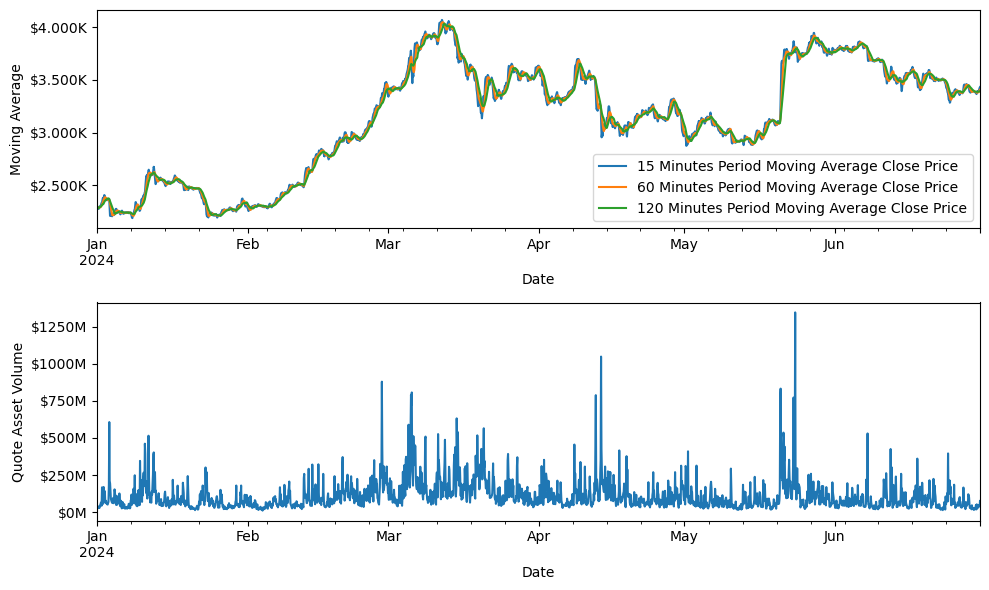

In [80]:
fig, ax = plt.subplots(2,1,figsize=(10, 6))

# Ploting the first line
df_15_pivot_updated.plot(kind='line', x='open_time', y='moving_average', ax=ax[0], label='15 Minutes Period Moving Average Close Price')
# Ploting the second line
df_60_pivot_updated.plot(kind='line', x='open_time', y='moving_average', ax=ax[0], label='60 Minutes Period Moving Average Close Price')

# Ploting the third line
df_120_pivot_updated.plot(kind='line', x='open_time', y='moving_average', ax=ax[0], label='120 Minutes Period Moving Average Close Price', xlabel='Date', ylabel='Moving Average')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${x/1000:.3f}K')
ax[0].yaxis.set_major_formatter(ticks_y)

df_120_pivot_updated.plot(kind='line', x='open_time', y='quote_asset_volume',ax=ax[1], legend=False, xlabel='Date', ylabel='Quote Asset Volume')
ticks_y = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().yaxis.set_major_formatter(ticks_y)
# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()